In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import statsmodels.api as sm

### 1. Interpretation and significance
Suppose that we would like to know how much families in the US are spending on recreation annually. We've estimated the following model:

 

𝑒𝑥𝑝𝑒𝑛𝑑𝑖𝑡𝑢𝑟𝑒=873+0.0012𝑎𝑛𝑛𝑢𝑎𝑙_𝑖𝑛𝑐𝑜𝑚𝑒+0.00002𝑎𝑛𝑛𝑢𝑎𝑙_𝑖𝑛𝑐𝑜𝑚𝑒2−223.57ℎ𝑎𝑣𝑒_𝑘𝑖𝑑𝑠expenditure=873+0.0012annual_income+0.00002annual_income2−223.57have_kids

expenditure is the annual spending on recreation in US dollars, annual_income is the annual income in US dollars, and have_kids is a dummy variable indicating the families with children. Interpret the estimated coefficients. What additional statistics should be given in order to make sure that your interpretations make sense statistically. Write up your answer.

### 2. Weather model
In this exercise, you'll work with the historical temperature data from the previous checkpoint. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

First, load the dataset from the weatherinszeged table from Thinkful's database.
Build a linear regression model where your target variable is the difference between the apparenttemperature and the temperature. As explanatory variables, use humidity and windspeed. Now, estimate your model using OLS. Are the estimated coefficients statistically significant? Are the signs of the estimated coefficients in line with your previous expectations? Interpret the estimated coefficients. What are the relations between the target and the explanatory variables?
Next, include the interaction of humidity and windspeed to the model above and estimate the model using OLS. Are the coefficients statistically significant? Did the signs of the estimated coefficients for humidity and windspeed change? Interpret the estimated coefficients.


### 3. House prices model
In this exercise, you'll interpret your house prices model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

Load the houseprices data from Thinkful's database.
Run your house prices model again and interpret the results. Which features are statistically significant, and which are not?
Now, exclude the insignificant features from your model. Did anything change?
Interpret the statistically significant coefficients by quantifying their relations with the house prices. Which features have a more prominent effect on house prices?
Do the results sound reasonable to you? If not, try to explain the potential reasons.

### 1. 

In order to properly interpret these coefficients we would also need to know the p and t values for each feature. These would tell us if these coefficients have stastical significance and can be said to be different from 0. 

### 2.

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

query1 = '''
SELECT
  *
FROM
  weatherinszeged
'''

temp_df = pd.read_sql_query(query1, con=engine)
engine.dispose()

In [3]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   date                 96453 non-null  datetime64[ns, UTC]
 1   summary              96453 non-null  object             
 2   preciptype           96453 non-null  object             
 3   temperature          96453 non-null  float64            
 4   apparenttemperature  96453 non-null  float64            
 5   humidity             96453 non-null  float64            
 6   windspeed            96453 non-null  float64            
 7   windbearing          96453 non-null  float64            
 8   visibility           96453 non-null  float64            
 9   loudcover            96453 non-null  float64            
 10  pressure             96453 non-null  float64            
 11  dailysummary         96453 non-null  object             
dtypes: datetime64[ns, 

In [4]:
temp_features = temp_df[['temperature', 'humidity', 'windspeed']]

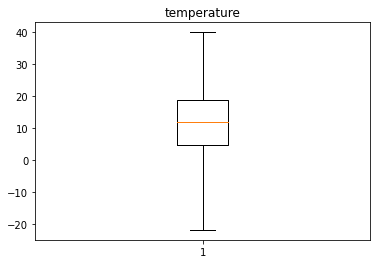

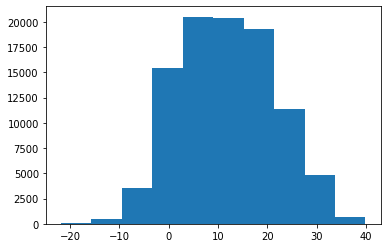

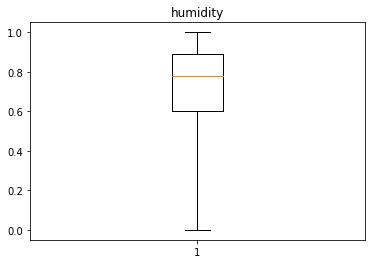

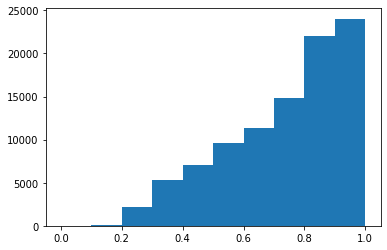

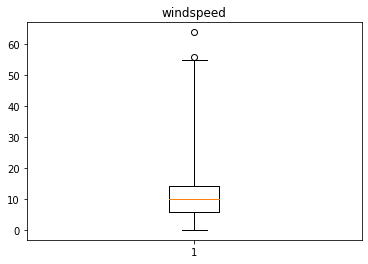

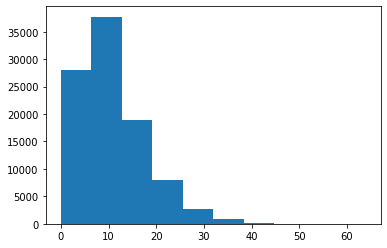

In [5]:
for column in temp_features.columns:
    plt.boxplot(temp_features[column], whis=5)
    plt.title(column)
    plt.show()
    plt.hist(temp_features[column])
    plt.show()

In [6]:
for column in temp_features.columns:
    temp_features.loc[:, column] = winsorize(temp_features.loc[:, column], (0.05, 0.05))

/home/owenhw/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [7]:
temp_X = temp_features[['humidity', 'windspeed']]
temp_y = temp_features['temperature']

In [8]:
temp_X = sm.add_constant(temp_X)

temp_results = sm.OLS(temp_y, temp_X).fit()

temp_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                 3.475e+04
Date:                Sat, 29 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:20:27   Log-Likelihood:            -3.2207e+05
No. Observations:               96453   AIC:                         6.441e+05
Df Residuals:                   96450   BIC:                         6.442e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.4772      0.107    350.149      0.000      37.267      37.687
humidity     -31.6521      0.120   -263.588      0.000     -31.887     -31.417
windspeed     -0.2112      0.004    -57.345      0.000      -0.218      -0.204
==============================================================================
Omnibus:                     2598.323   Durbin-Watson:                   0.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1849.440
Skew:                          -0.236   Prob(JB):                         0.00
Kurtosis:                       2.512   Cond. No.                         88.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
temp_features['windspeed_x_humidity'] = temp_features['windspeed'] * temp_features['humidity'] 

<ipython-input-9-6235e44bf3f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_features['windspeed_x_humidity'] = temp_features['windspeed'] * temp_features['humidity']


In [10]:
temp_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   temperature           96453 non-null  float64
 1   humidity              96453 non-null  float64
 2   windspeed             96453 non-null  float64
 3   windspeed_x_humidity  96453 non-null  float64
dtypes: float64(4)
memory usage: 2.9 MB


In [11]:
windspeed_x_humidity_X = temp_features['windspeed_x_humidity']

In [12]:
windspeed_x_humidity_X = sm.add_constant(windspeed_x_humidity_X)

windspeed_x_humidity_results = sm.OLS(temp_y, windspeed_x_humidity_X).fit()

windspeed_x_humidity_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     7442.
Date:                Sat, 29 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:20:37   Log-Likelihood:            -3.4465e+05
No. Observations:               96453   AIC:                         6.893e+05
Df Residuals:                   96451   BIC:                         6.893e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   15.9354      0.054    294.360      0.000      15.829      16.041
windspeed_x_humidity    -0.5297      0.006    -86.266      0.000      -0.542      -0.518
==============================================================================
Omnibus:                    13585.902   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3364.944
Skew:                          -0.073   Prob(JB):                         0.00
Kurtosis:                       2.097   Cond. No.                         17.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Are the estimated coefficients statistically significant? Are the signs of the estimated coefficients in line with your previous expectations? Interpret the estimated coefficients. What are the relations between the target and the explanatory variables? 


The estimated coefficents are statistically significant but our R-squared value is quite low: below .5. This indicates that our model is not performing very well. The signs of the coefficents are both negative meaning that a rise in the value of each feature would correspond to a fall in the value of the target variable. In this case for every increase of 1 point in hummidity we could expect to see also a 32 degree drop in temperature. Windspeed has a much weaker influence with each point increase leading to only a two tenths of a degree drop in temperature.


### Next, include the interaction of humidity and windspeed to the model above and estimate the model using OLS. Are the coefficients statistically significant? Did the signs of the estimated coefficients for humidity and windspeed change? Interpret the estimated coefficients.

The coefficents are still statistically significant and now our R-squared value is much higher. Furthermore the signs of the coefficent has not changed. For each point increase in the factor of windspeed and humidity we can expect to see only .5 degree drop in temperature.



### 3.

In [13]:
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

query2 = '''
SELECT
  *
FROM
  houseprices
'''

df = pd.read_sql_query(query2, con=engine)
engine.dispose()

In [14]:
df['total_square_feet'] = df['totalbsmtsf'] + df['grlivarea'] 

In [15]:
features = ['exterqual', 'kitchenqual', 'has_central_air', 'neighborhood', 'total_square_feet', 'yearbuilt', 'saleprice']

In [16]:
df['has_central_air'] = pd.get_dummies(df['centralair'], drop_first=True)

In [17]:
df_features = df[features]

In [18]:
df_features = pd.concat([df_features, pd.get_dummies(df_features['kitchenqual'])], axis=1)

In [19]:
df_features['kitchen_quality_excelent'] = df_features['Ex']
df_features['kitchen_quality_average'] = df_features['TA']
df_features['kitchen_quality_good'] = df_features['Gd']

df_features.drop(['Fa', 'TA', 'Gd', 'Ex', 'kitchenqual'], inplace=True, axis=1)

In [20]:
df_features = pd.concat([df_features, pd.get_dummies(df_features['neighborhood'], drop_first=True)], axis=1)

In [21]:
df_features = pd.concat([df_features, pd.get_dummies(df_features['exterqual'])], axis=1)

In [22]:
df_features['exterior_quality_excelent'] = df_features['Ex']
df_features['exterior_quality_good'] = df_features['Gd']
df_features['exterior_quality_average'] = df_features['TA']

df_features.drop(['Ex', 'Gd', 'TA', 'Fa', 'exterqual', 'neighborhood'], inplace=True, axis=1)

In [23]:
conts = ['saleprice', 'yearbuilt', 'total_square_feet']

In [24]:
for column in conts:
    df_features[column] = winsorize(df_features[column], (.05, .05))

In [25]:
X = df_features.drop('saleprice', axis=1)
y = df_features['saleprice']

In [26]:
X = sm.add_constant(X)

houseprices_results = sm.OLS(y, X).fit()

houseprices_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     254.9
Date:                Sat, 29 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:21:48   Log-Likelihood:                -16831.
No. Observations:                1460   AIC:                         3.373e+04
Df Residuals:                    1426   BIC:                         3.391e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -5.626e+05   1.08e+05     -5.230      0.000   -7.74e+05   -3.52e+05
has_central_air            1.331e+04   3034.256      4.388      0.000    7361.329    1.93e+04
total_square_feet            49.1223      1.302     37.726      0.000      46.568      51.676
yearbuilt                   286.5479     53.956      5.311      0.000     180.707     392.389
kitchen_quality_excelent   4.219e+04   5777.913      7.302      0.000    3.09e+04    5.35e+04
kitchen_quality_average    4319.7509   4528.443      0.954      0.340   -4563.374    1.32e+04
kitchen_quality_good       1.846e+04   4857.282      3.801      0.000    8934.452     2.8e+04
Blueste                    9353.9193   1.87e+04      0.500      0.617   -2.74e+04    4.61e+04
BrDale                    -8095.9953   9010.249     -0.899      0.369   -2.58e+04    9578.770
BrkSide                     1.33e+04   7854.156      1.693      0.091   -2111.809    2.87e+04
ClearCr                    3.015e+04   7996.639      3.771      0.000    1.45e+04    4.58e+04
CollgCr                    1.517e+04   6389.518      2.375      0.018    2640.365    2.77e+04
Crawfor                    4.255e+04   7715.573      5.514      0.000    2.74e+04    5.77e+04
Edwards                    -838.5105   7071.556     -0.119      0.906   -1.47e+04     1.3e+04
Gilbert                    2.211e+04   6721.089      3.289      0.001    8921.515    3.53e+04
IDOTRR                     5099.4371   8342.142      0.611      0.541   -1.13e+04    2.15e+04
MeadowV                   -1.674e+04   8870.181     -1.887      0.059   -3.41e+04     663.470
Mitchel                    6354.0478   7281.039      0.873      0.383   -7928.648    2.06e+04
NAmes                      4260.3764   6790.746      0.627      0.531   -9060.548    1.76e+04
NPkVill                    6376.3558   1.05e+04      0.607      0.544   -1.42e+04     2.7e+04
NWAmes                     1.429e+04   7027.398      2.034      0.042     509.444    2.81e+04
NoRidge                    5.558e+04   7287.824      7.626      0.000    4.13e+04    6.99e+04
NridgHt                    4.038e+04   6875.471      5.873      0.000    2.69e+04    5.39e+04
OldTown                     427.1769   7575.626      0.056      0.955   -1.44e+04    1.53e+04
SWISU                      1045.3485   8842.128      0.118      0.906   -1.63e+04    1.84e+04
Sawyer                     3979.0676   7156.899      0.556      0.578   -1.01e+04     1.8e+04
SawyerW                     1.42e+04   6930.598      2.049      0.041     608.137    2.78e+04
Somerst                    2.911e+04   6605.297      4.408      0.000    1.62e+04    4.21e+04
StoneBr                    4.192e+04   7896.214      5.309      0.000    2.64e+04    5.74e+04
Timber                     3.477e+04   7335.191      4.740      0.000    2.

### Which features are statistically significant, and which are not? Now, exclude the insignificant features from your model. Did anything change? Interpret the statistically significant coefficients by quantifying their relations with the house prices. Which features have a more prominent effect on house prices? Do the results sound reasonable to you? If not, try to explain the potential reasons.

I have changed this model somewhat from how it was implemented for previous assignmets. I have attemdpted to refine it a little further.

All of my coefficents seem significat. I'm still a little unclear about how to handle dummy coefficents. Should I a categorical feature to be significant as long as one of the dummies is significant? 

My R-squared value is fairly good.

These results seem reasonable to me. a $49.12 increase in sale price for each squarefoot in particular seems reasonable. Additionally the neighborhood variables seem to be in line with what we would expect.